In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import glob

# Bilder einlesen

test
['../resources/images\\Squat_deep_Timo.jpg', '../resources/images\\Squat_high_Timo.jpg', '../resources/images\\Squat_middle_Timo.jpg']
image: ../resources/images\Squat_deep_Timo.jpg


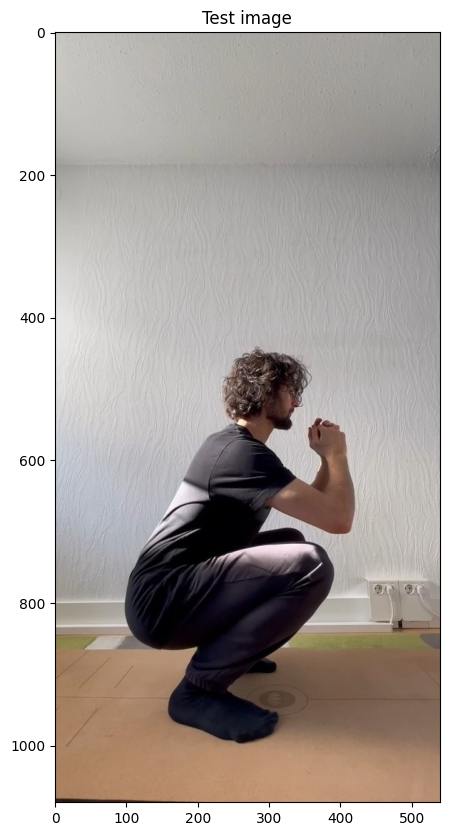

image: ../resources/images\Squat_high_Timo.jpg


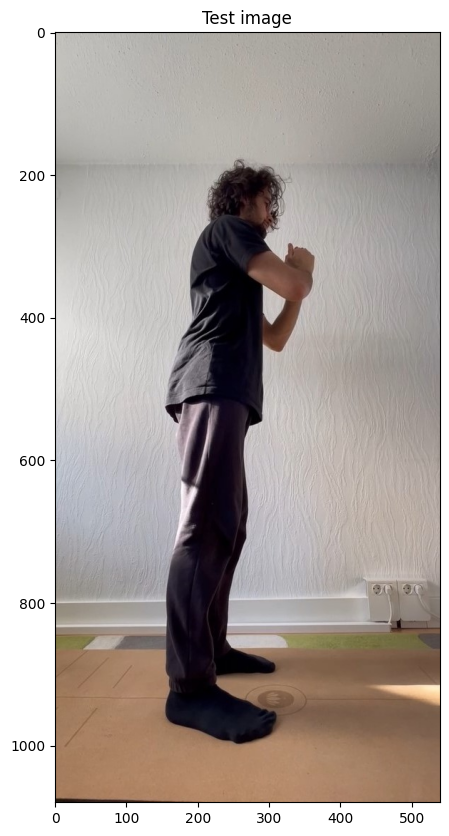

image: ../resources/images\Squat_middle_Timo.jpg


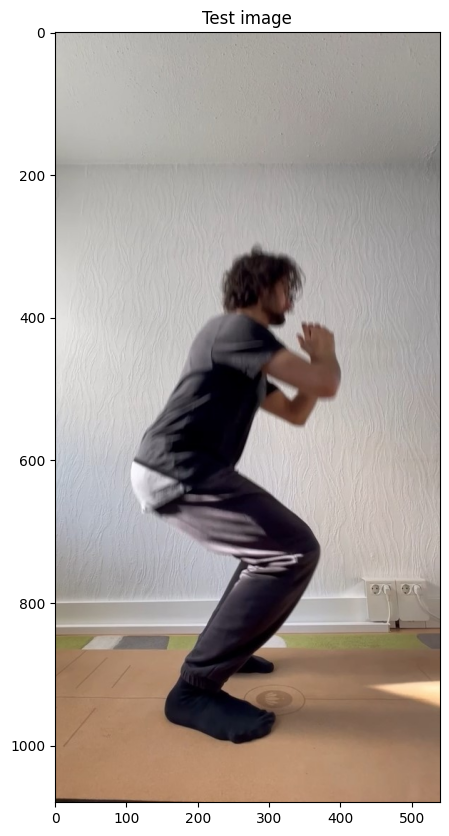

In [21]:
# Load test images

print("test")

image_path = glob.glob('../resources/images/*.jpg')
print(str(image_path))
images = []

for img in image_path:
    print("image: " + img)
    # Load the test image
    test_img = cv.imread(img)

    images.append(test_img)

    # Show Testimage
    plt.figure(figsize=(20, 10))
    plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
    plt.title('Test image')
    plt.show()

# Segmentierung des Bildes
 schränken Sie das Bild auf den Bereich ein, in dem sich die Spurmarkierungen befinden
 Durch das Zuschneiden der Bilder schränken wir den Inhalt auf den wichtigen Bereich, die Straße, ein. Dadurch können wir die Rechenzeit verringern.


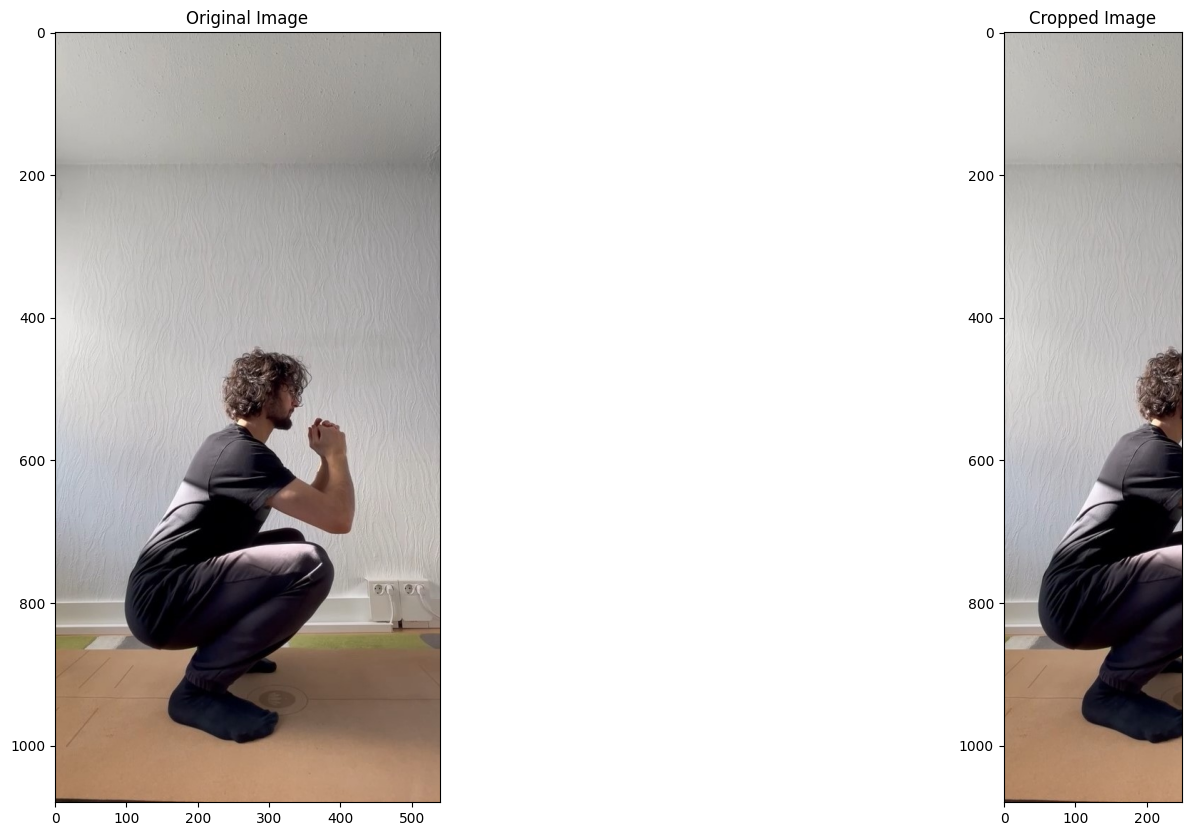

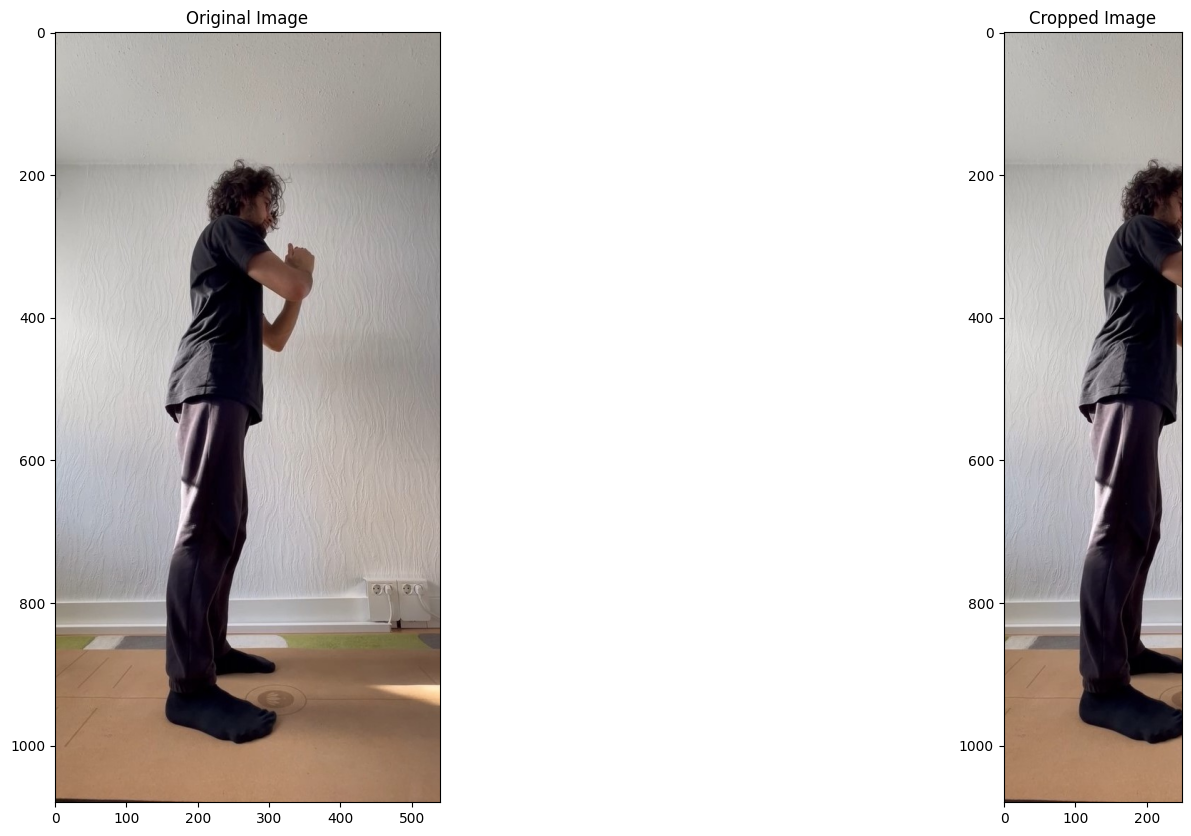

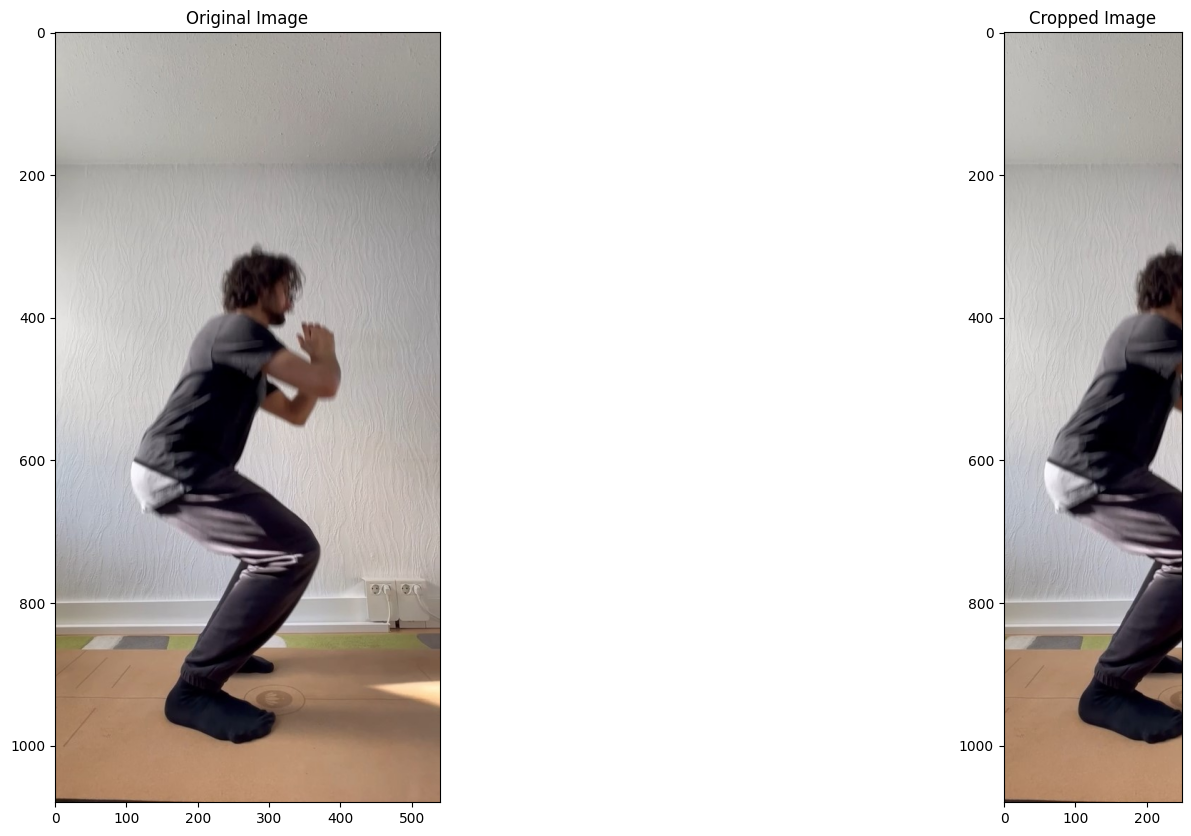

In [40]:
cropped_images = []

for img in images:
    # zuschneiden des Bildes
    cropped_img = img[:, 50:300]
    cropped_images.append(cropped_img)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv.cvtColor(cropped_images[-1], cv.COLOR_BGR2RGB))
    plt.show()


# Edge Detection
Trying to detect spine with different edge detection methods

## Canny edge detection

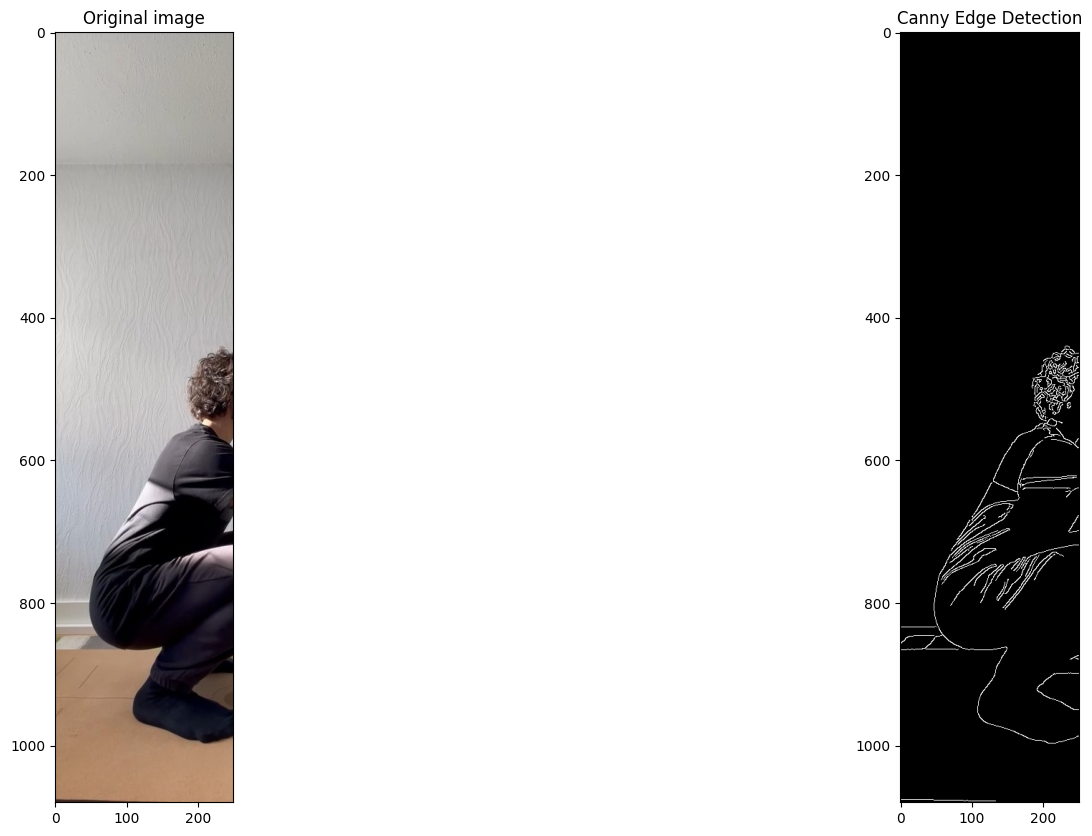

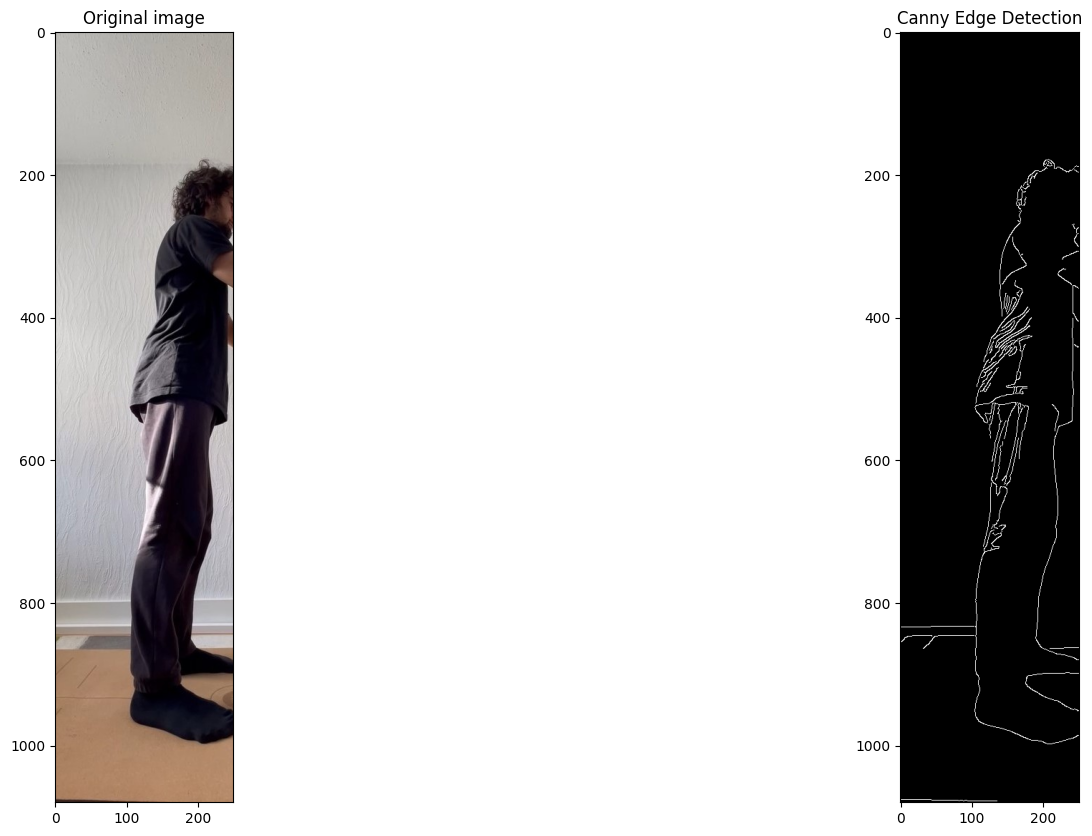

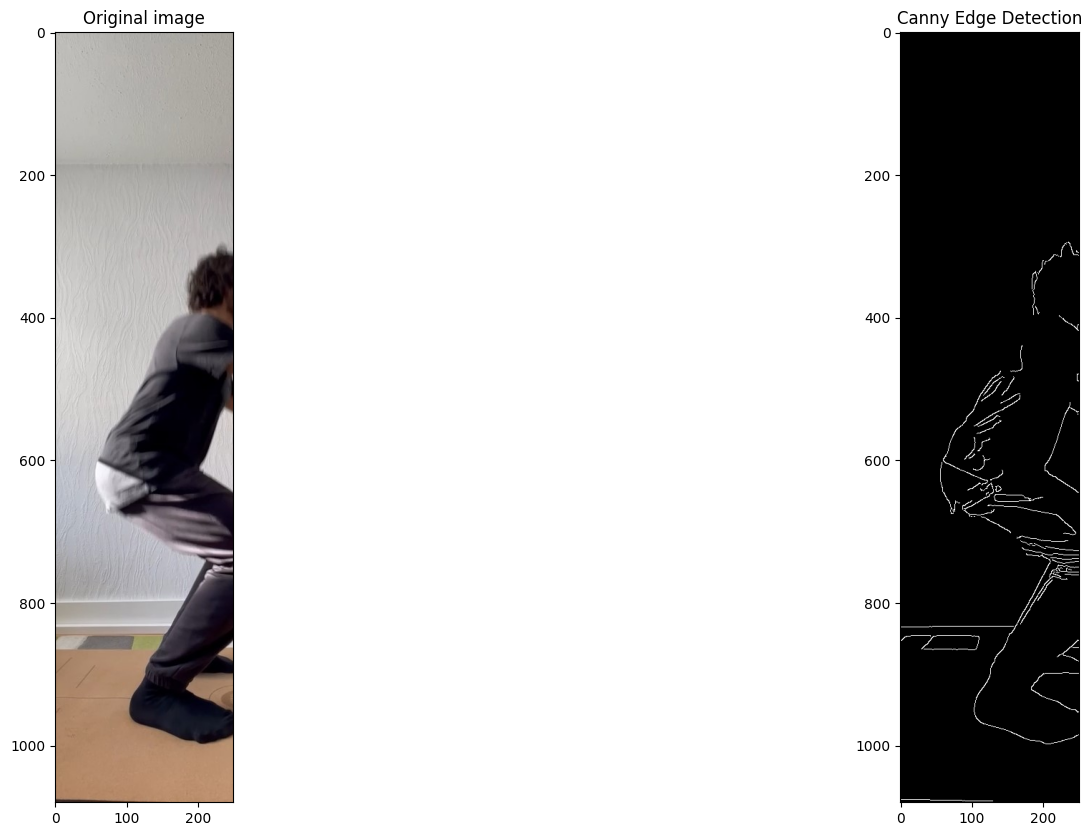

In [38]:
for img in cropped_images:
    # Convert to grayscale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)

    # Apply Canny Edge Detection
    img_canny = cv.Canny(img_blur, 50, 150)

    # Show image
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(img_canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()

## Sobel edge detection

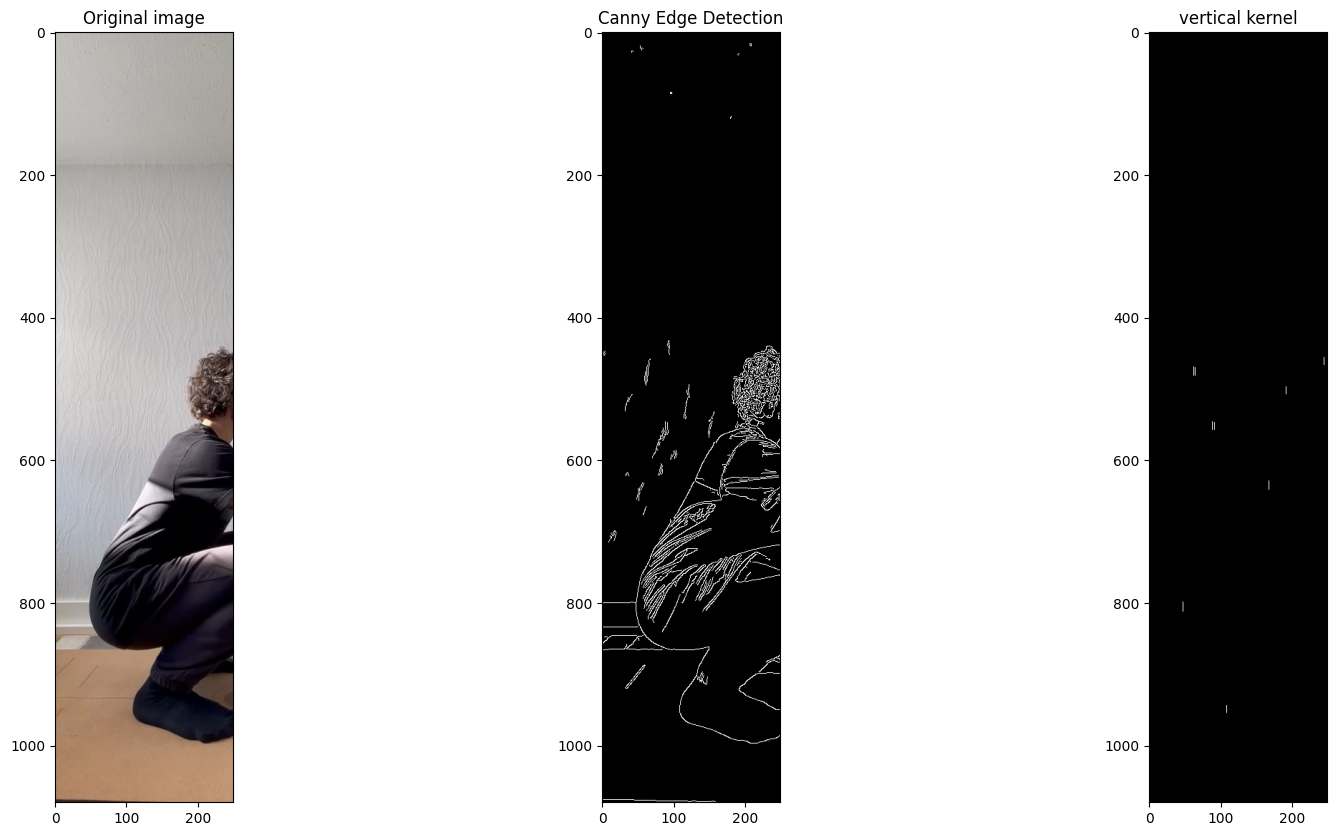

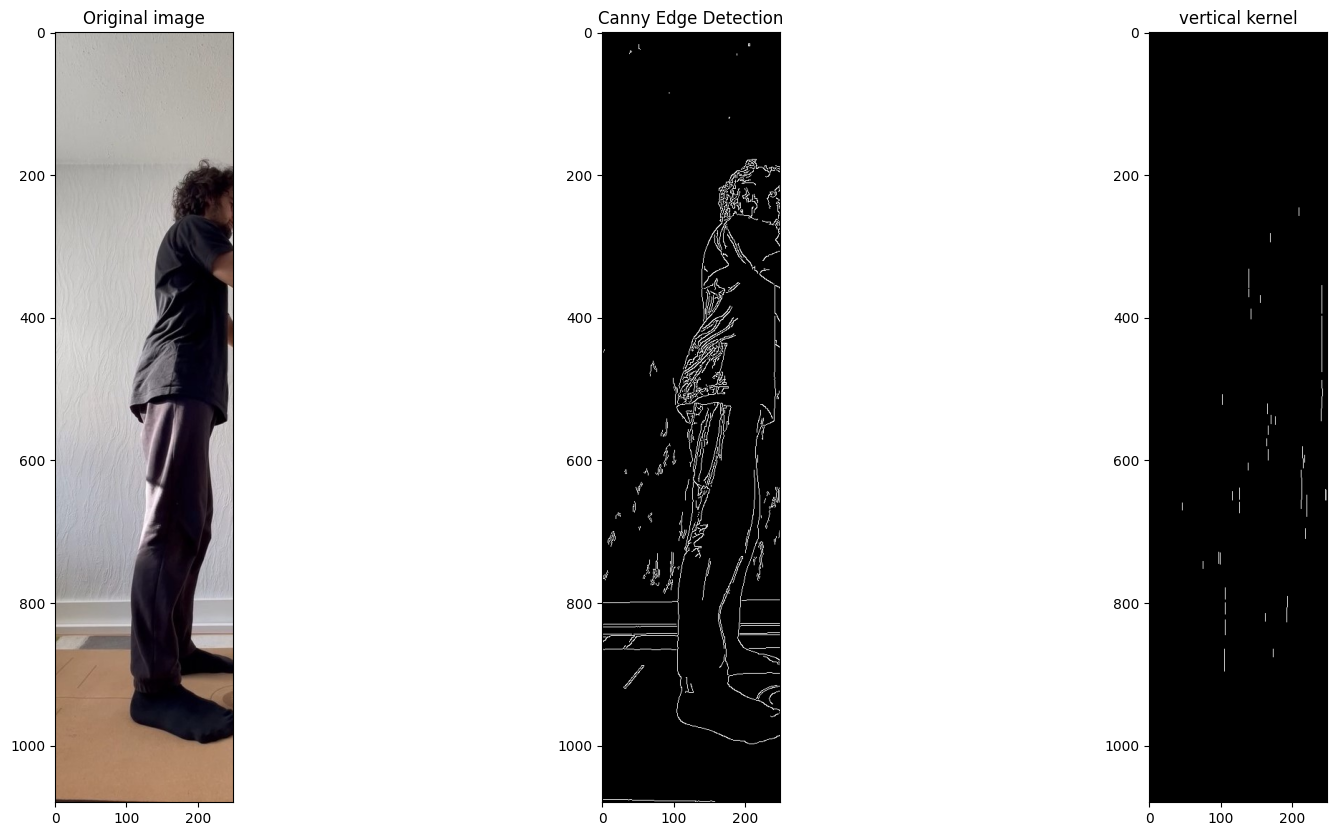

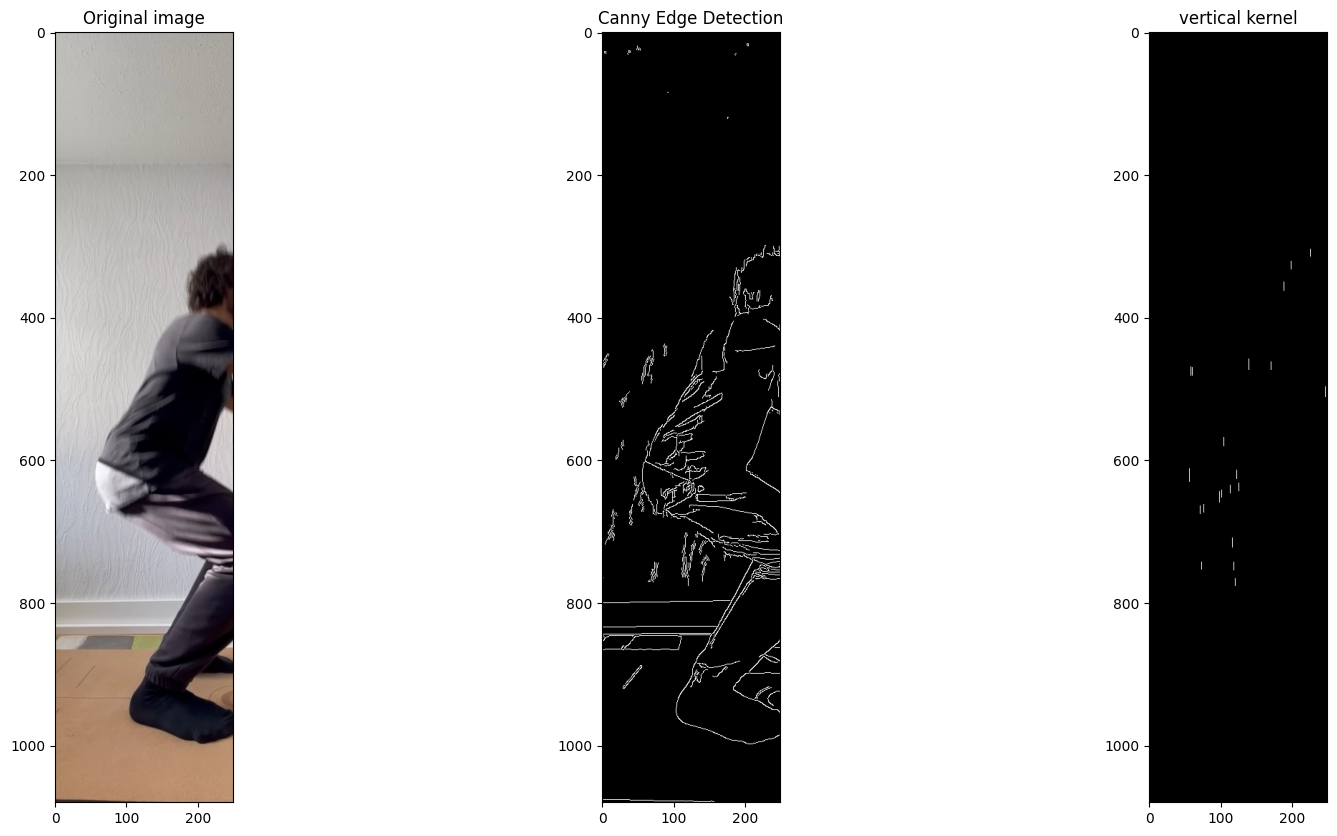

In [48]:
# detect vertical lines
kernel_ver = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]], 'uint8')

for img in cropped_images:
    # Convert to grayscale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    img_canny = cv.Canny(img_gray, 50, 150)

    # Apply vertical kernel
    img_canny_ver = cv.morphologyEx(img_canny, cv.MORPH_OPEN, kernel_ver, iterations=5)

    # Show image
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 3, 2)
    plt.imshow(img_canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.subplot(1, 3, 3)
    plt.imshow(img_canny_ver, cmap='gray')
    plt.title('vertical kernel')
    plt.show()

# Farbräume, Histogramme

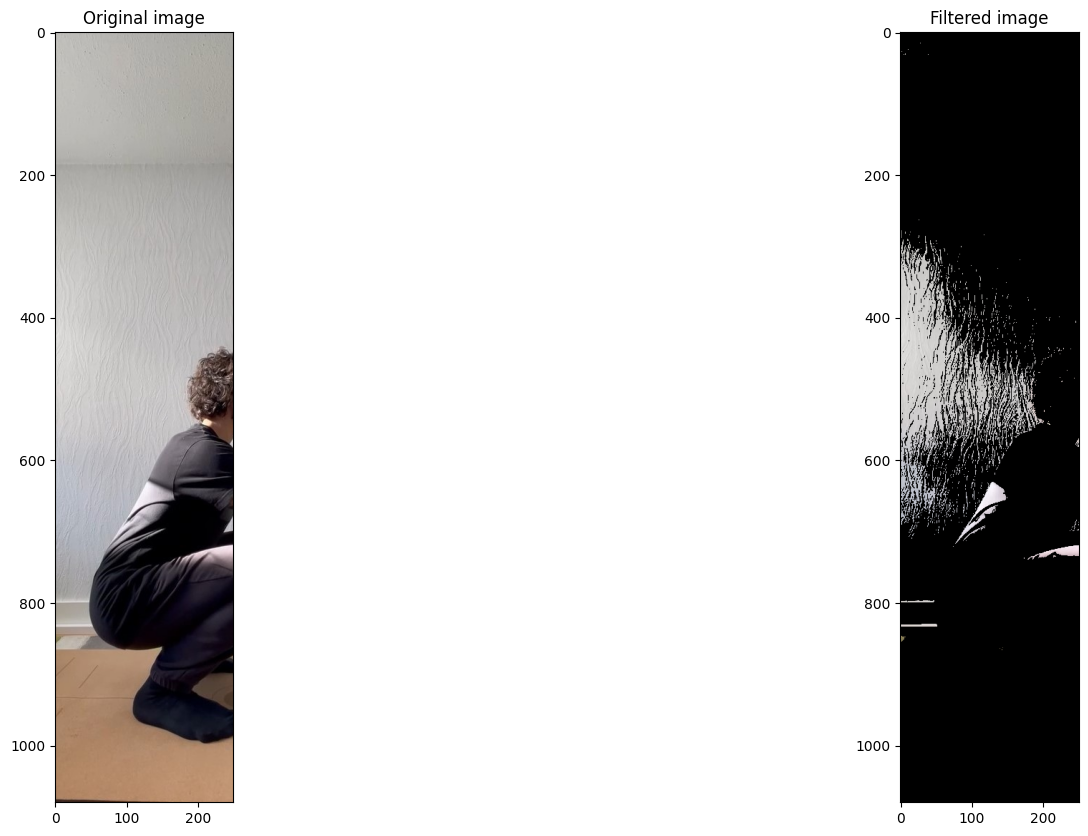

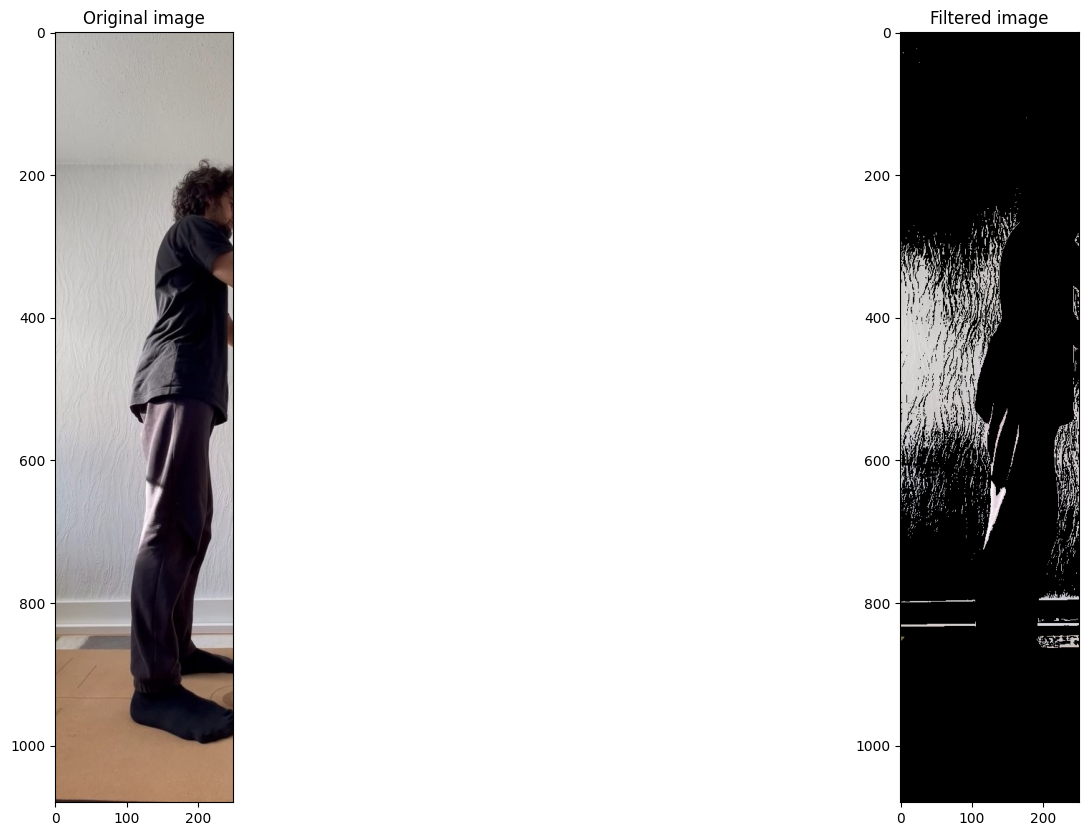

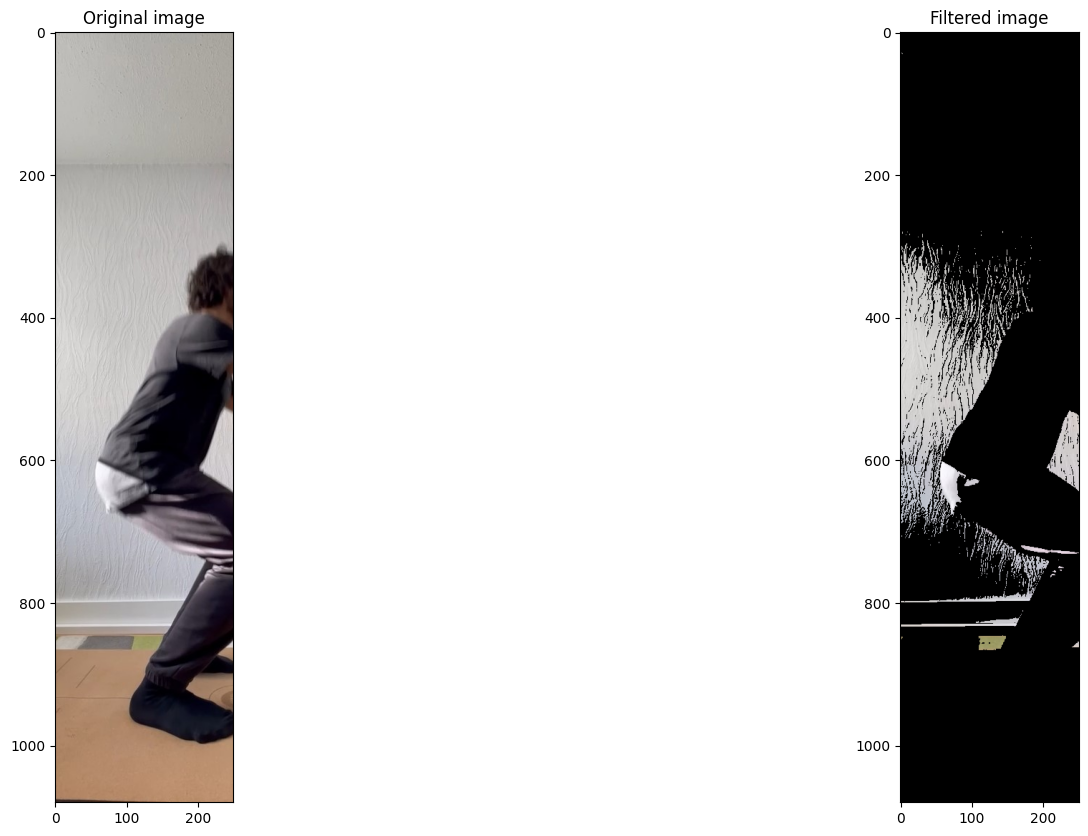

In [37]:
for img in cropped_images:
    # Convert BGR to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # define yellow color range in HSV
    lower_yellow = np.array([20, 80, 20])
    upper_yellow = np.array([30, 255, 255])
    img_yellow = cv.inRange(img_hsv, lower_yellow, upper_yellow)

    # filter yellow areas
    img_filtered_yellow = img.copy()
    img_filtered_yellow[np.where(img_yellow == 0)] = 0

    # define white color range in HSV
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([255, 30, 255])
    img_white = cv.inRange(img_hsv, lower_white, upper_white)

    # filter white areas
    img_filtered_white = img.copy()
    img_filtered_white[np.where(img_white == 0)] = 0

    img_filtered = img_filtered_yellow + img_filtered_white

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img_filtered, cv.COLOR_BGR2RGB))
    plt.title('Filtered image')
    plt.show()

### Codeoptimierung
Im folgenden Code wurden einige Optimierungen vorgenommen, um die Verarbeitungsgeschwindigkeit zu erhöhen.
- Vektorisierung nutzen: Nutzung von Funktionen, die für Arrays optimiert sind, und Vermeidung von Schleifen. 
- Farbbereich als Tupel speichern, um die Übergabe an Funktionen zu vereinfachen

In [ ]:
def filter_color_range(img, lower, upper):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, lower, upper)
    filtered_img = cv.bitwise_and(img, img, mask=mask)
    return filtered_img


# Farbbereiche definieren
yellow_range = (np.array([20, 100, 20]), np.array([30, 255, 255]))
white_range = (np.array([0, 0, 200]), np.array([255, 30, 255]))

# Filtern für jedes Bild in undistorted_images
filtered_images = []
for img in wrapped_images:
    img_filtered_yellow = filter_color_range(img, *yellow_range)
    img_filtered_white = filter_color_range(img, *white_range)
    img_filtered = cv.addWeighted(img_filtered_yellow, 1, img_filtered_white, 1, 0)
    filtered_images.append(img_filtered)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img_filtered, cv.COLOR_BGR2RGB))
    plt.title('Filtered image')
    plt.show()

## 5. Thresholding

In [ ]:
thresh_images = []
for img in filtered_images:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # add thresholding
    _, binary_image = cv.threshold(img_gray, 180, 255, cv.THRESH_BINARY)

    thresh_images.append(binary_image)

    # Zeige die Bilder
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Thresholding ')
    plt.show()

## 6. Curve / Polynom Fitting
- Erkennen Sie die Krümmung der Fahrspur und geben Sie diese im Ausgabebild aus
- Validierung des Verfahrens: Umrechnung auf Straßenkrümmung, sodass Simulation erfolgreich bestanden wird

In [ ]:
def generate_curve_function(params):
    return lambda x: params[0] * x ** 2 + params[1] * x + params[2]


curves = []

kernel_ver = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]], 'uint8')

for img, img_lanes in zip(undistorted_images, thresh_images):
    opening_img_lanes = cv.morphologyEx(img_lanes, cv.MORPH_OPEN, kernel_ver, iterations=5)

    # show image
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 3, 2)
    plt.imshow(img_lanes, cmap='gray')
    plt.title("Detected lanes")
    plt.subplot(1, 3, 3)
    plt.imshow(opening_img_lanes, cmap='gray')
    plt.title("Opening on lanes")
    plt.show()

    img_lanes = opening_img_lanes
    # curve fitting for left and right lane
    left_x, left_y = np.where(img_lanes[:, :int(img_lanes.shape[1] / 2)] == 255)
    right_x, right_y = np.where(img_lanes[:, int(img_lanes.shape[1] / 2):] == 255)
    left_fit = np.polyfit(left_x, left_y, 2)
    right_fit = np.polyfit(right_x, right_y, 2)

    # show curve fitting
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_lanes, cmap='gray')
    plt.title("Detected lanes with opening")
    plt.subplot(1, 2, 2)
    plt.plot(left_y, left_x, 'o', color='red')
    plt.plot(right_y + int(img_lanes.shape[1] / 2), right_x, 'o', color='blue')
    plt.plot(np.polyval(left_fit, left_x), left_x, '-', color='red')
    plt.plot(np.polyval(right_fit, right_x) + int(img_lanes.shape[1] / 2), right_x, '-', color='blue')
    plt.xlim(0, img_lanes.shape[1])
    plt.ylim(img_lanes.shape[0], 0)
    plt.legend(['Left lane', 'Right lane'])
    plt.title("Curve fitting")
    plt.show()

    # parameters for curve fitting are stored in left_fit and right_fit as a list 
    # left_fit[0] * x**2 + left_fit[1] * x + left_fit[2]
    # right_fit[0] * x**2 + right_fit[1] * x + right_fit[2]
    print("left_fit: " + str(left_fit[0]) + "x^2 + " + str(left_fit[1]) + "x + " + str(left_fit[2]))
    print("right_fit: " + str(right_fit[0]) + "x^2 + " + str(right_fit[1]) + "x + " + str(right_fit[2]))

## 7. Rücktransformation der Vogelperspektive zum Originalbild oder Anzeige der Spurmarkierungen auf dem Originalbild mithilfe gefundener Funtktion durch Curve-Fitting
Die angezeigten Bilder werden in den fertigen Programmen auf das unzugeschnittene aber entzerrte Bild gelegt, sodass nicht nur die Fahrspuhr zu erkennen ist.

In [ ]:
def generate_curve_function(params):
    return lambda x: params[0] * x ** 2 + params[1] * x + params[2]


curves = []

kernel_ver = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]], 'uint8')

for img, img_lanes in zip(cropped_images, thresh_images):
    
    opening_img_lanes = cv.morphologyEx(img_lanes, cv.MORPH_OPEN, kernel_ver, iterations=5)
    
    img_lanes = opening_img_lanes
    print(img_lanes.shape)
    # curve fitting for left and right lane
    left_x, left_y = np.where(img_lanes[:, :int(img_lanes.shape[1] / 2)] == 255)
    right_x, right_y = np.where(img_lanes[:, int(img_lanes.shape[1] / 2):] == 255)
    left_fit = np.polyfit(left_x, left_y, 2)
    right_fit = np.polyfit(right_x, right_y, 2)
    
    # show curve fitting
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_lanes, cmap='gray')
    plt.title("Detected lanes with opening")
    plt.subplot(1, 2, 2)
    plt.plot(left_y, left_x, 'o', color='red')
    plt.plot(np.polyval(left_fit, left_x), left_x, '-', color='red')
    plt.plot(right_y + int(img_lanes.shape[1] / 2), right_x, 'o', color='blue')
    plt.plot(np.polyval(right_fit, right_x) + int(img_lanes.shape[1] / 2), right_x, '-', color='blue')
    plt.xlim(0, img_lanes.shape[1])
    plt.ylim(img_lanes.shape[0], 0)
    plt.legend(['Left lane', 'Right lane'])
    plt.title("Curve fitting")
    plt.show()
    # 
    # parameters for curve fitting are stored in left_fit and right_fit as a list 
    # left_fit[0] * x**2 + left_fit[1] * x + left_fit[2]
    # right_fit[0] * x**2 + right_fit[1] * x + right_fit[2]
    # ax^2 + bx + c
    print("left_fit: " + str(left_fit[0]) + "x^2 + " + str(left_fit[1]) + "x + " + str(left_fit[2]))
    print("right_fit: " + str(right_fit[0]) + "x^2 + " + str(right_fit[1]) + "x + " + str(right_fit[2]))
    # 
    # 
    # Erzeuge eine Liste von x-Werten
    x_values_left = np.linspace(0, 800, 100)
    x_values_right = np.linspace(0, 800, 100)
    
    # Erzeuge die y-Werte basierend auf der Funktion
    curve_function_left = generate_curve_function(left_fit)
    y_values_left = curve_function_left(x_values_left)
    curve_function_right = generate_curve_function(right_fit)
    y_values_right = curve_function_right(x_values_right)
    
    # Lade das Originalbild
    original_image = img.copy()
    
    # create image from curve function
    img_lanes = np.zeros_like(original_image)
    for i in range(len(x_values_left) - 1):
        cv.line(img_lanes, (int(y_values_left[i]), int(x_values_left[i])),
                (int(y_values_left[i + 1]), int(x_values_left[i + 1])), (255, 0, 0), 25)
        cv.line(img_lanes, (int(y_values_right[i]) + int(img_lanes.shape[1] / 2), int(x_values_right[i])),
                (int(y_values_right[i + 1]) + int(img_lanes.shape[1] / 2), int(x_values_right[i + 1])), (255, 0, 0), 25)
    
    # copy image only to execute pieces of code independently
    img_marked_lanes = original_image.copy()
    # Erzeuge eine Maske basierend auf img_lanes
    mask = np.zeros_like(img_marked_lanes)
    mask[:, :, :] = img_lanes  # Setze den roten Kanal auf den Wert von img_lanes
    
    # Rücktransformation der Vogelperspektive bei Funktionen
    # Die Quell- und Ziel-Punkte für die Perspektivtransformation definieren
    src = np.float32([[340, 40], [540, 40], [870, 240], [10, 240]])
    dst = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
    
    # Die inverse Transformationsmatrix berechnen
    M_inv = cv.getPerspectiveTransform(dst, src)
    
    # Die Rücktransformation der Vogelperspektive zum Originalbild durchführen
    mask_inv = cv.warpPerspective(mask, M_inv, (mask.shape[1], mask.shape[0]))
    
    # Erzeuge ein boolean-Array für die Pixel, die in der Maske gesetzt sind
    mask_pixels = mask_inv[:, :, 0] == 255
    
    # Setze die Farbwerte für die Pixel in img_original, wo die Maske gesetzt ist
    img_marked_lanes[mask_pixels] = [0, 0, 255]
    
    # show image
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img_marked_lanes, cv.COLOR_BGR2RGB))
    plt.title("Detected lanes")
    plt.show()

## Codeoptimierung 
In dem Projekt wird als Beschleunigungsmethode des Programms das Filtern nach Farben der Fahrspur (gelb und weiß), Thresholding und Curve Fitting in einem separaten Thread durchgeführt. Dadurch können die gelben und weißen Bereiche in den Bildern parallel gefiltert werden. Dadurch wird die Verarbeitungsgeschwindigkeit erhöht. 

Die Optimierung wurde direkt in den Python Programmen `lane_detection.py` und `lane_detection_challenge.py` sowie dem Jupyter-Notebook `lane_detection_kitty.ipynb`umgesetzt.
